<a href="https://colab.research.google.com/github/onexmaster/quantum_computing/blob/master/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem 1**
Implement a simulation of the Hadamard test for any qubit state |psi> and any single qubit unitary U using numpy. Observe that you have to compute how the state of the quantum register changes. It is not enough to just code up the formula for the probabilities that we derived in class.

Recall that you can realize the controlled-U gate as follows:  |0><0|⊗I+|1><1|⊗U . Use the numpy command np.kron for the tensor product.

For  |ψ>  use the state  |0>  and for the unitary U use the orthogonal matrix that describes the rotation by angle  2πθ , where  θ∈[0,1) .

Create a plot showing the probability Pr(0) in dependence on theta.


---


***Below shows the steps to apply Hadamard Test on Qubits ***




1.   Apply Hadamard transformatin to only the first qbit.
2.   Apply Controlled-U gate. 
3.   Find the temp result of controlled U Gate and first qbit
4.   Measure the probability using projector operator








In [0]:
import numpy as np
import scipy as sp
from matplotlib import pyplot
from scipy import linalg as la

# Define matrices
ket_0 = np.array([[1],[0]])
ket_1 = np.array([[0],[1]])
identity = np.matrix([[1,0],[0,1]])
hadamard_matrix = np.matrix([[1,1],[1,-1]])


#This Function simulates the hadamard transformation   
def hadamard_gate(ket_psi):
  return np.matmul(((1/(np.sqrt(2)))*hadamard_matrix),ket_psi)


#This Functions simulates Controlled-U Gate
def controlled_gate(U, ket_psi):
  return np.dot((np.kron(outer_product(ket_0), identity) +
           (np.kron(outer_product(ket_1), U))), ket_psi)

# This Functions find the outer product which is just basic matrix multiplication
def outer_product(ket_psi):
  bra_psi = np.conj(ket_psi).T
  return np.matmul(ket_psi, bra_psi)

#This Functions simulates the hadamard Test 
def hadamard_test(ket_psi, U):
  #  1
  h1 = hadamard_gate(ket_0)
  h1 = np.kron(h1, ket_psi)

  #  2
  controlled_U = controlled_gate(U, h1)

  #  3
  H_matrix = (1/(np.sqrt(2))) * hadamard_matrix 
  H_1_qu = np.kron(H_matrix, identity)
  temp_result = np.dot(H_1_qu, controlled_U)
  
  #  4
  result = la.norm(np.dot(np.kron(outer_product(ket_0), identity), temp_result)) ** 2
  return result

Text(0, 0.5, 'Probability')

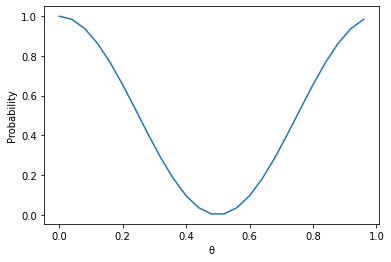

In [26]:
#Testing the Function on Rotation Matrix where theta lies between 0 and 2pi
ket_psi = np.array([[1],[0]])
theta = np.linspace(0, 1, 25,endpoint=False)
probability = np.empty(25)
for i in range(25):
  angle = 2*np.pi*theta[i]
  U = np.array(([np.cos(angle), -np.sin(angle)],[np.sin(angle), np.cos(angle)]))
  probability[i] = hadamard_test(ket_psi, U)

pyplot.plot(theta, probability)
pyplot.xlabel('θ')
pyplot.ylabel('Probability')

# **PROBLEM 2**
Implement a simulation of the SWAP test.

Use  |ψ1⟩=|0⟩  and  |ψ2⟩=cos(2πθ)|0⟩+sin(2πθ)|1⟩ . Create a plot showing the probability Pr(0) in dependence on theta.

***Below shows the steps to apply Swap Test on TWo Qubits ***

Apply Hadamard transformatin to only the first qbit.



1.   Apply Hadamard Gate on psi1 and psi2. 
2.   Apply Controlled Swap Gate on the reuslt of step 1.
3.   Find the temp result of controlled swap Gate and first qbit
4.   Measure the probability using projection vector


In [0]:
#This function applies the swap gate to ket vector
def controlled_swap_gate(ket_psi):
  swap = np.array([[1,0,0,0,0,0,0,0],
                  [0,1,0,0,0,0,0,0],
                  [0,0,1,0,0,0,0,0],
                  [0,0,0,1,0,0,0,0],
                  [0,0,0,0,1,0,0,0],
                  [0,0,0,0,0,0,1,0],
                  [0,0,0,0,0,1,0,0],
                  [0,0,0,0,0,0,0,1]])
  return np.dot(swap, ket_psi)
#This function simulates the swap test
def swap_test(ket_psi_1, ket_psi_2):
  # 1
  h1 = hadamard_gate(ket_0)
  hadamard_gate_ket_0 = np.kron(np.kron(h1, ket_psi_1), ket_psi_2)

  # 2
  controlled_swap = controlled_swap_gate(hadamard_gate_ket_0)

  #  3
  H_matrix = (1/(np.sqrt(2))) * hadamard_matrix 
  H_q1 = np.kron(np.kron(H_matrix, identity),identity)
  temp_swap_result = np.dot(H_q1, controlled_swap)

  # 4
  result = la.norm(np.dot(np.kron(np.kron(outer_product(ket_0), identity), identity),temp_swap_result)) ** 2
  return result

Text(0, 0.5, 'Probability')

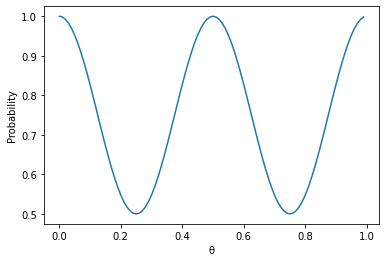

In [25]:
ket_psi_1 = np.array([[1],[0]])
theta = np.linspace(0, 1, 100, endpoint=False)
probability = np.empty(100)
for i in range(100):
  angle = 2*np.pi*theta[i]
  ket_psi_2 = np.cos(angle)*ket_0 + np.sin(angle) * ket_1
  probability[i] = swap_test(ket_psi_1, ket_psi_2)

pyplot.plot(theta, probability)
pyplot.xlabel('θ')
pyplot.ylabel('Probability')